<a href="https://colab.research.google.com/github/Akshata1992/TensorFlow/blob/master/TF2_0_SpamDetection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import tensorflow library
import tensorflow as tf
print(tf.__version__)

2.3.0


In [33]:
#import all other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,Conv1D,Dense,Flatten,GlobalMaxPooling1D,Embedding,MaxPooling1D
from tensorflow.keras.models import Model

print("All libraries loaded successfully")

All libraries loaded successfully


In [5]:
#Get the csv file
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-08-19 11:07:30--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 172.67.213.166, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2020-08-19 11:07:30 (9.33 MB/s) - ‘spam.csv’ saved [503663/503663]



In [6]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
#Drop the unneccessary columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns = ['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['b_labels'] = df['labels'].map({'ham':0,'spam':1})
Y = df['b_labels'].values

In [14]:
#split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(df['data'],Y, test_size = 0.33)

In [15]:
#Convert the word into sequences
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [19]:
word2idx = tokenizer.word_index
V= len(word2idx)

In [25]:
#Add the padding to the sequences to get in N x T
data_train = pad_sequences(sequences_train)
T = data_train.shape[1]
data_train.shape

(3733, 162)

In [24]:
data_test = pad_sequences(sequences_test,maxlen=T)
data_test.shape

(1839, 162)

In [34]:
#Create our model
D = 20

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = Conv1D(32,3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3,activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

In [35]:
#compile and fit the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
r = model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=10)

Epoch 1/10
117/117 [==============================] - 2s 21ms/step - loss: 0.3854 - accuracy: 0.8677 - val_loss: 0.2933 - val_accuracy: 0.8624
Epoch 2/10
117/117 [==============================] - 2s 20ms/step - loss: 0.1734 - accuracy: 0.9212 - val_loss: 0.1275 - val_accuracy: 0.9483
Epoch 3/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0327 - accuracy: 0.9877 - val_loss: 0.0760 - val_accuracy: 0.9815
Epoch 4/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0840 - val_accuracy: 0.9837
Epoch 5/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0819 - val_accuracy: 0.9848
Epoch 6/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0800 - val_accuracy: 0.9853
Epoch 7/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0718 - val_accuracy: 0.9869

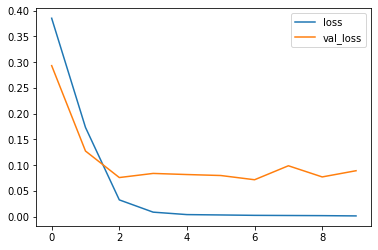

In [36]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

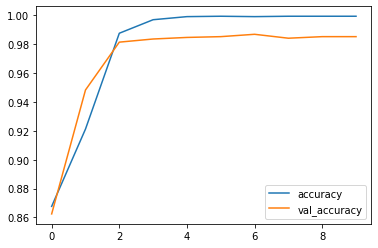

In [37]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [38]:
model.evaluate(data_test,y_test)

58/58 [==============================] - 0s 6ms/step - loss: 0.0893 - accuracy: 0.9853


[0.08927126228809357, 0.985318124294281]